# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [1]:
import numpy as np
import pandas as pd
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
# plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [3]:
iris =load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 와인 데이터

In [5]:
wine = load_wine()

In [6]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 유방암 데이터

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 회귀를 위한 데이터

### 보스턴 주택 가격 데이터

In [9]:
boston = load_boston()

In [10]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 당뇨병 데이터

In [11]:
diabetes = load_diabetes()

In [12]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [13]:
X = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model = model.fit(X,y)

In [14]:
model.predict([[2., 2.]])

array([1])

In [15]:
model.predict_proba([[2., 2.]])

array([[0., 1.]])

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [16]:
model = DecisionTreeClassifier()

In [17]:
cross_val_score(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5, 
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [18]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [19]:
cross_val_score(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5, 
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

#### 학습된 결정 트리 시각화

In [20]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### 텍스트를 통한 시각화

In [21]:
r = tree.export_text(decision_tree=model, 
                     feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

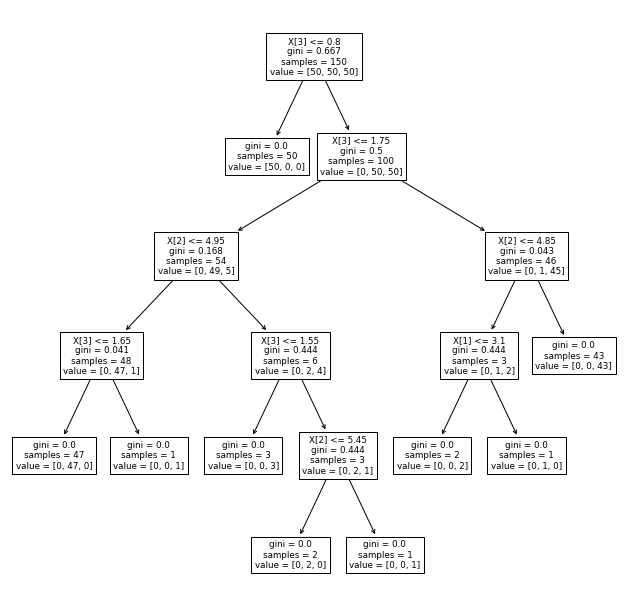

In [22]:
plt.figure(figsize=(11,11))
tree.plot_tree(model);

##### graphviz를 사용한 시각화

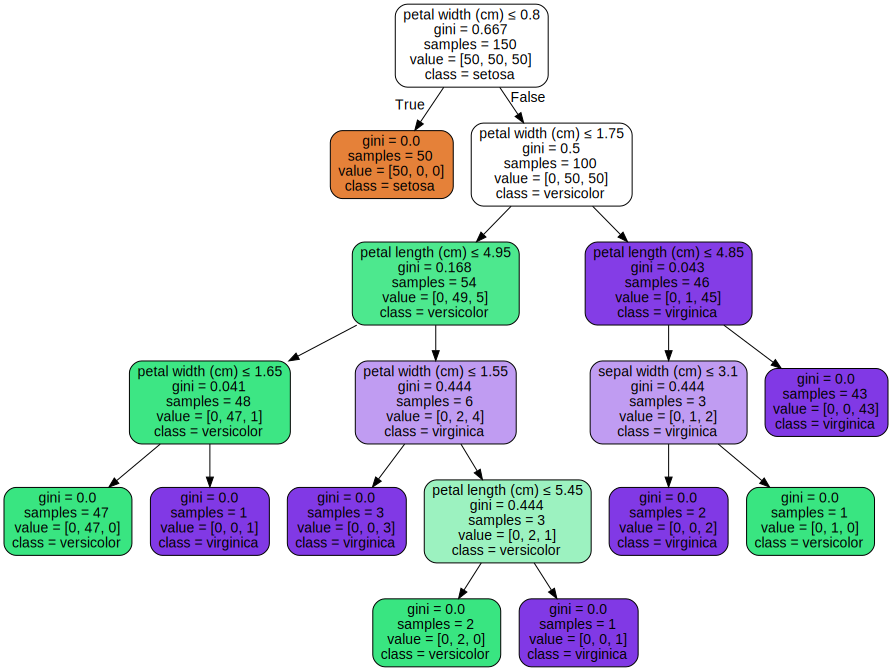

In [23]:
dot_data = tree.export_graphviz(decision_tree=model, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [24]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 2.67)

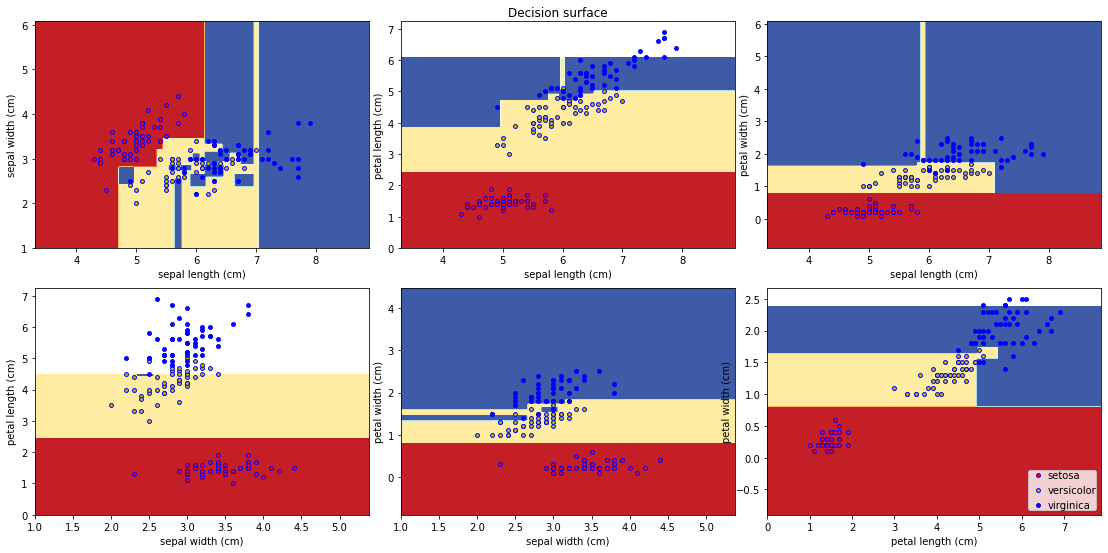

In [25]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0,1],[0, 2], [0,3],
                                [1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    
    model=DecisionTreeClassifier()
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[: 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

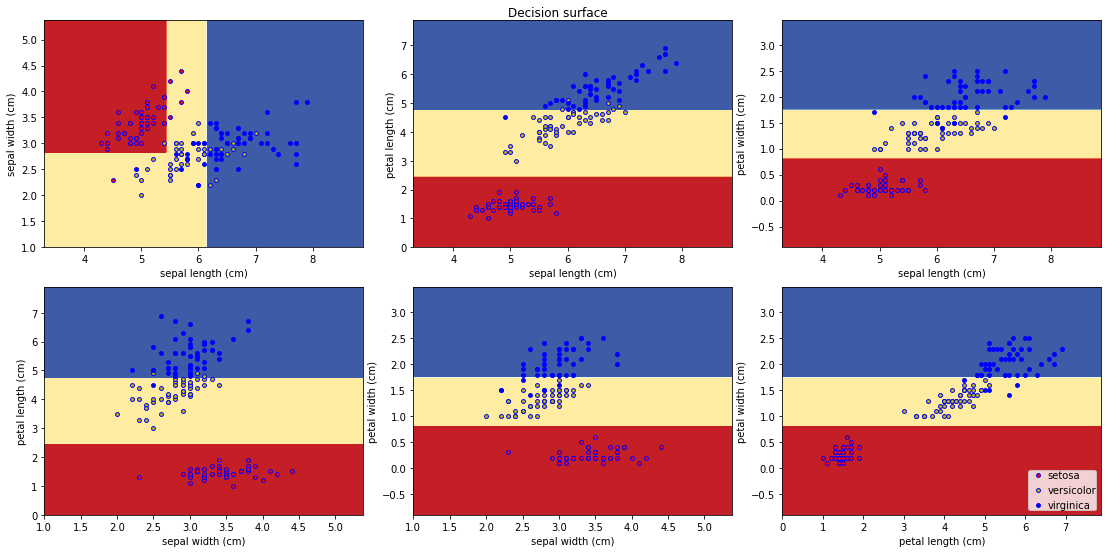

In [26]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0,1],[0, 2], [0,3],
                                [1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    
    model=DecisionTreeClassifier(max_depth=2)
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 와인 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [27]:
model = DecisionTreeClassifier()

In [28]:
cross_val_score(
    estimator=model, 
    X = wine.data, y=wine.target,
    cv=5
)

array([0.91666667, 0.80555556, 0.88888889, 0.91428571, 0.85714286])

##### 전처리 후 학습

In [29]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [30]:
cross_val_score(
    estimator=model, 
    X = wine.data, y=wine.target,
    cv=5
)

array([0.91666667, 0.83333333, 0.91666667, 0.91428571, 0.85714286])

#### 학습된 결정 트리 시각화

In [31]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### 텍스트를 통한 시각화

In [32]:
r = tree.export_text(decision_tree=model,
                     feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- malic_acid <= 2.39
|   |   |   |   |--- class: 1
|   |   |   |--- malic_acid >  2.39
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- proline <= 655.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- proline >  655.00
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- color_intensity <= 3.43
|   |

##### plot_tree를 사용한 시각화

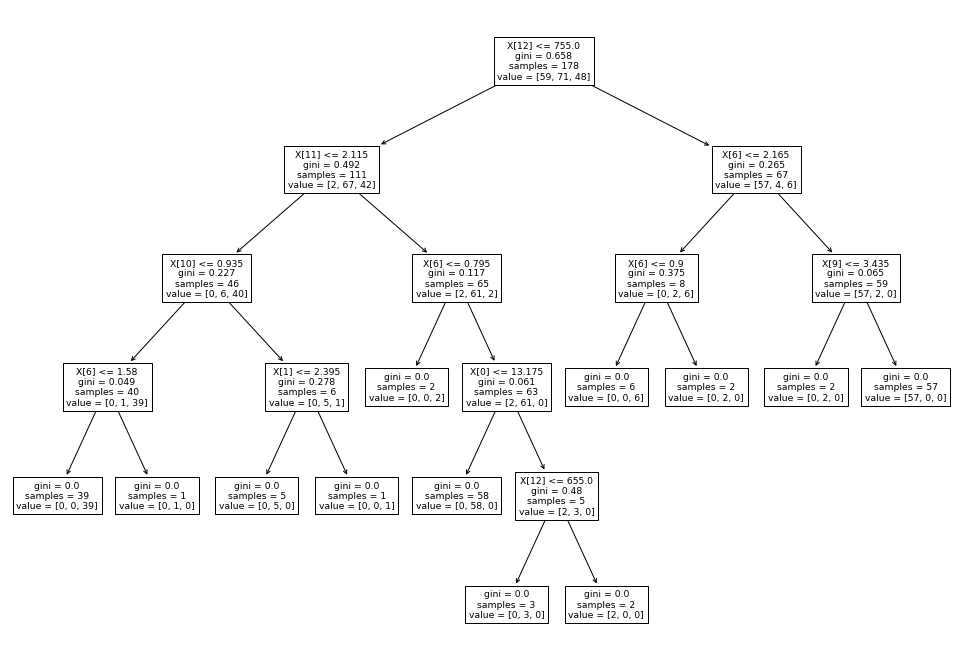

In [33]:
plt.figure(figsize=(17, 12))
tree.plot_tree(model);

##### graphviz를 사용한 시각화

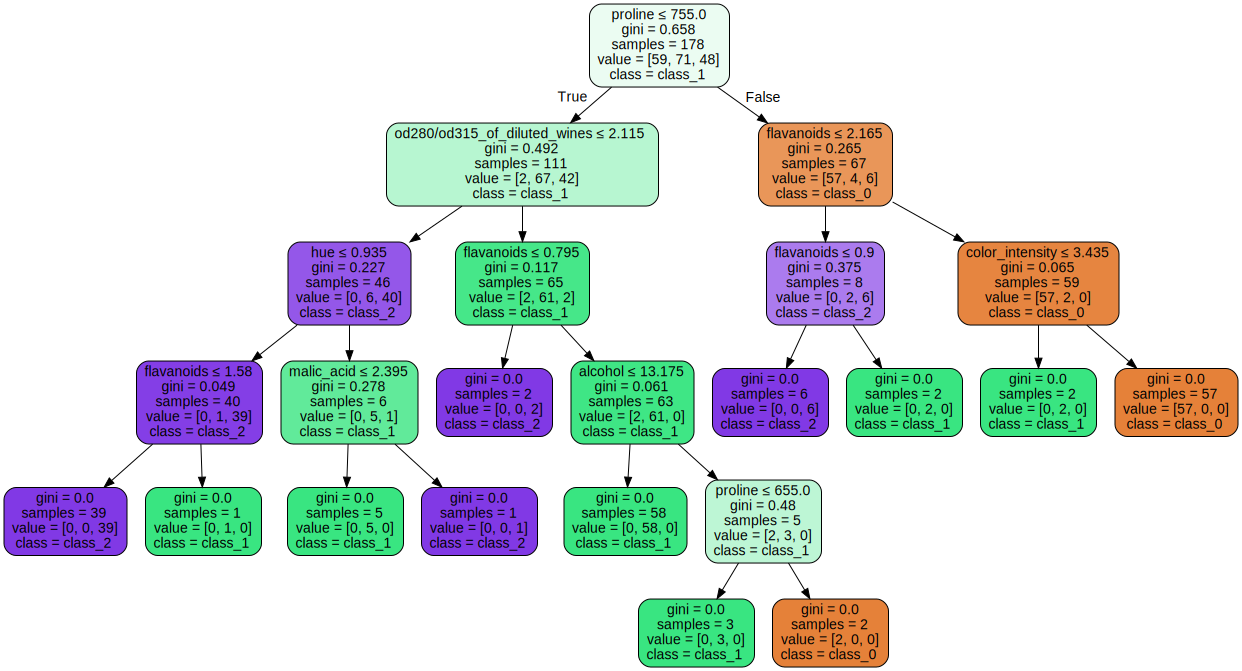

In [34]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [35]:
n_classes=3
plot_colors = 'ryb'
plot_step=0.02

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

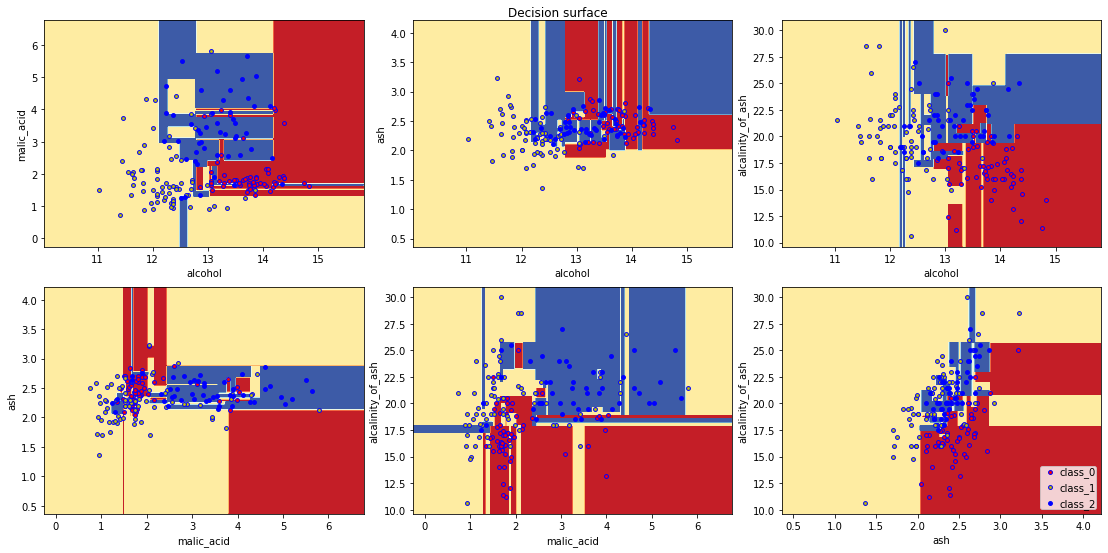

In [36]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1],[0, 2], [0, 3],
                                [1, 2],[1, 3], [2, 3]]):
    X = wine.data[:,pair]
    y = wine.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 7.880000000000008)

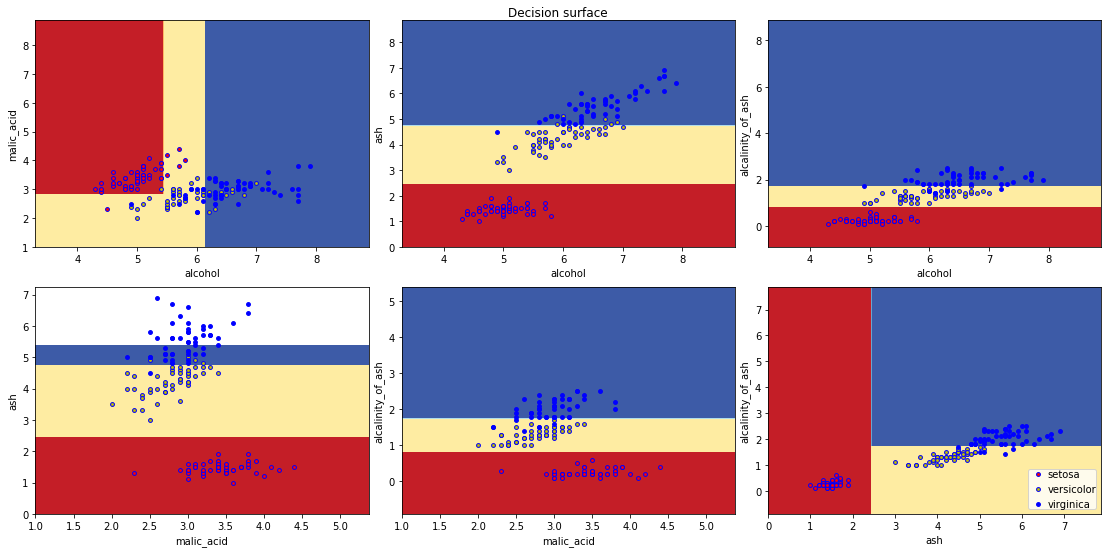

In [37]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0,1],[0, 2], [0,3],
                                [1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    
    model=DecisionTreeClassifier(max_depth=2)
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [38]:
model = DecisionTreeClassifier()

In [39]:
cross_val_score(
    estimator= model, 
    X=cancer.data, y=cancer.target,
    cv=5, 
    n_jobs=multiprocessing.cpu_count()
)

array([0.9122807 , 0.92982456, 0.92105263, 0.92982456, 0.89380531])

##### 전처리 후 학습

In [40]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [41]:
cross_val_score(
    estimator= model, 
    X=cancer.data, y=cancer.target,
    cv=5, 
    n_jobs=multiprocessing.cpu_count()
)

array([0.9122807 , 0.92982456, 0.92105263, 0.94736842, 0.90265487])

#### 학습된 결정 트리 시각화

In [42]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### 텍스트를 통한 시각화

In [43]:
r = tree.export_text(decision_tree=model)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_12 <= 6.60
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_26 <= 0.19
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_26 >  0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_27 <= 0.12
|   |   |   |   |   |--- feature_5 <= 0.06
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  0.06
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_27 >  0.12
|   |   |   |   |   |--- class: 0
|   |   |--

##### plot_tree를 사용한 시각화

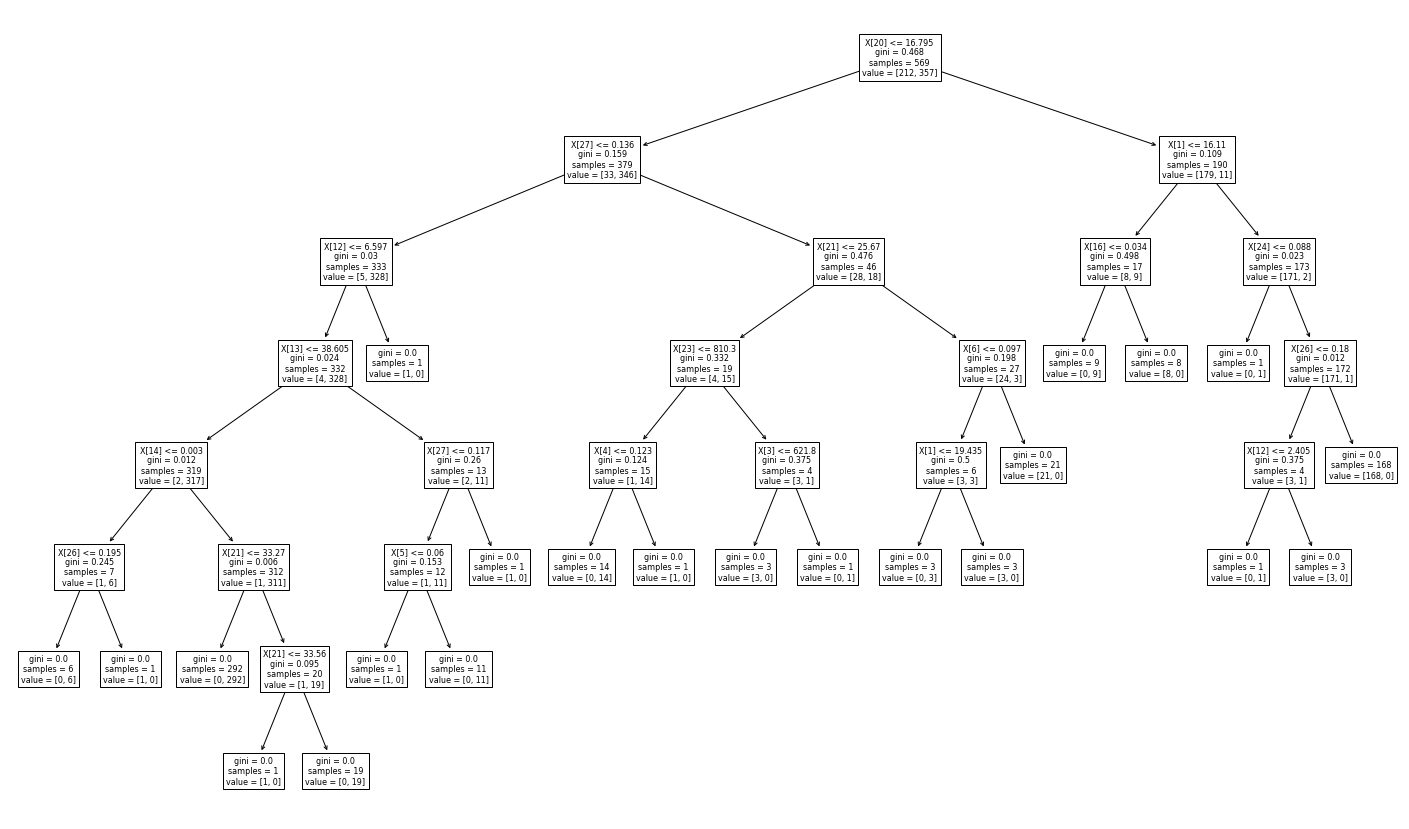

In [44]:
plt.figure(figsize=(25, 15))
tree.plot_tree(model);

##### graphviz를 사용한 시각화

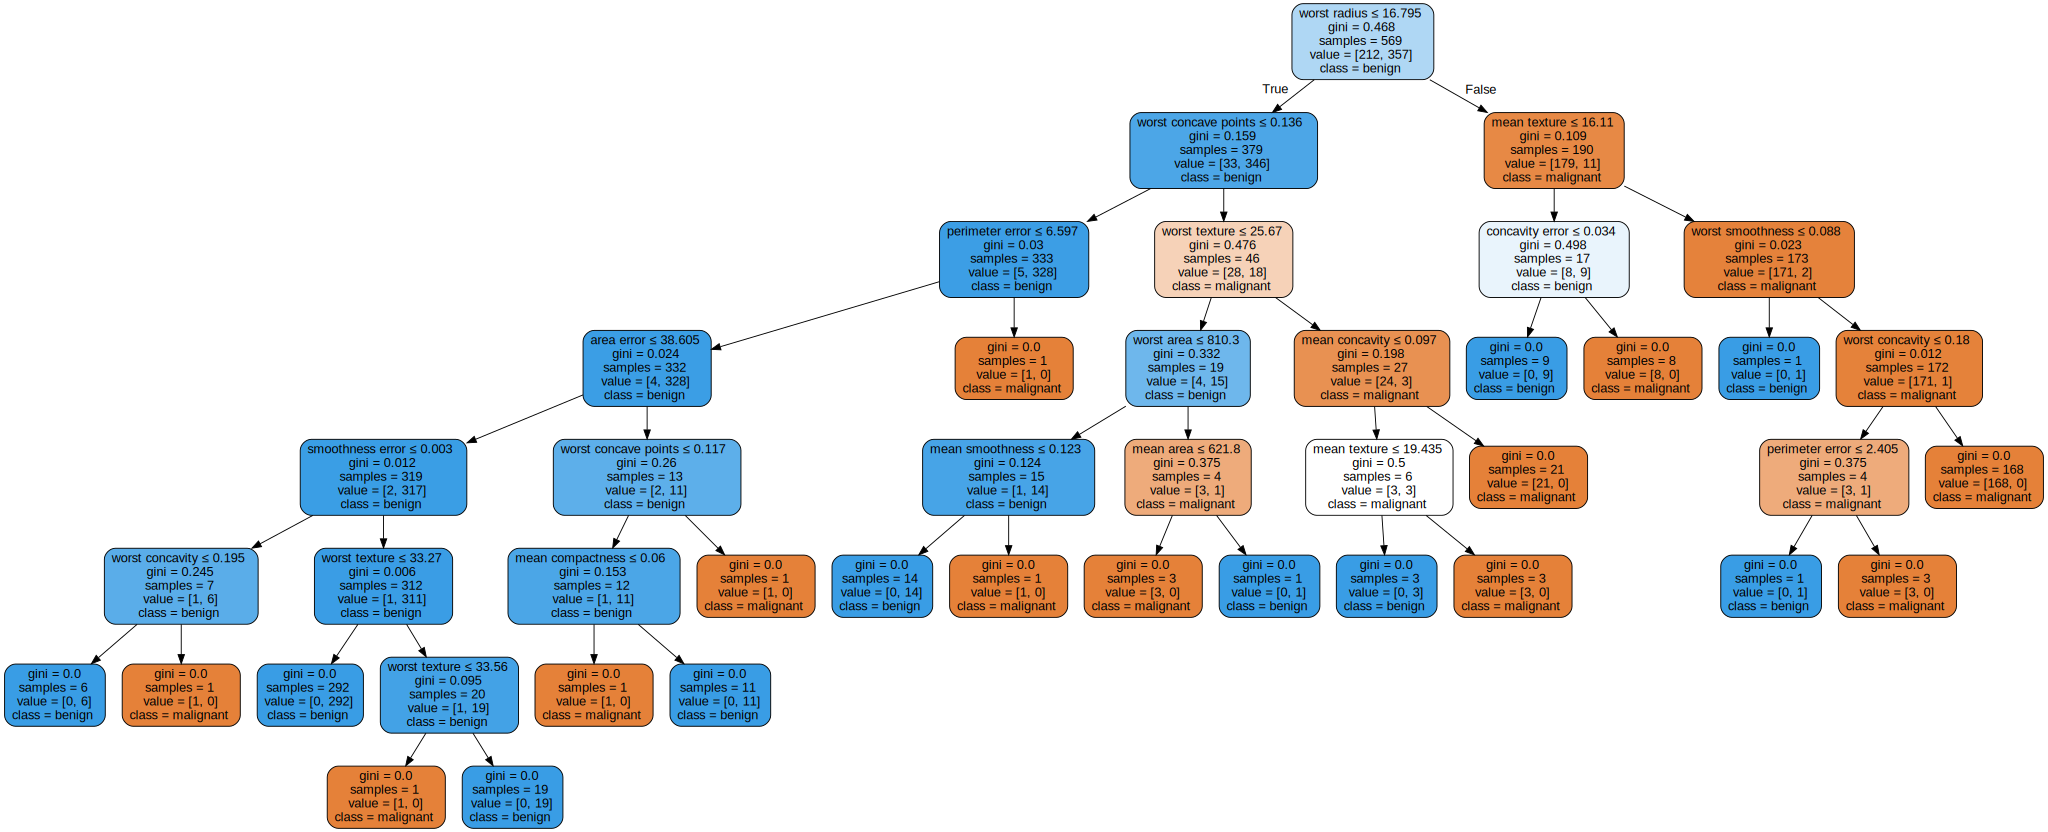

In [45]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled=True,rounded=True,
                                special_characters=True)
graph=graphviz.Source(dot_data)
graph

#### 시각화

In [46]:
n_classes=2
plot_colors='ryb'
plot_step=0.02

##### 결정 경계 시각화

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

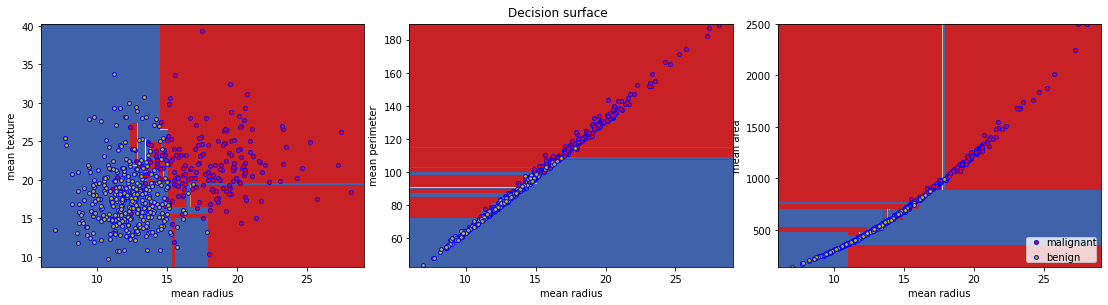

In [47]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1],[0, 2], [0, 3]]):
    X = cancer.data[:,pair]
    y = cancer.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

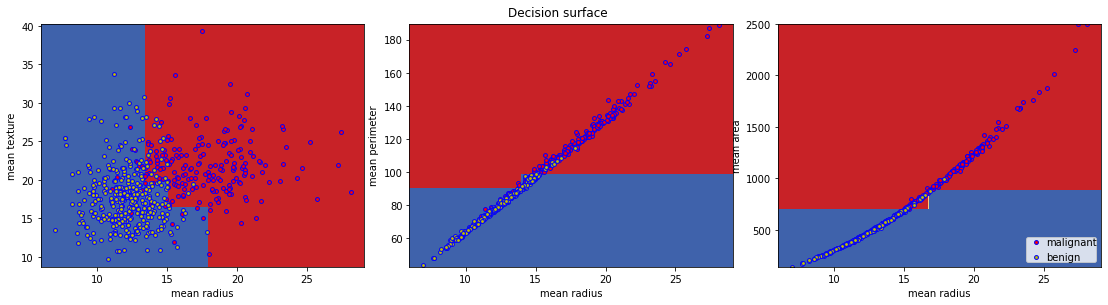

In [49]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1],[0, 2], [0, 3]]):
    X = cancer.data[:,pair]
    y = cancer.target
    
    model = DecisionTreeClassifier(max_depth=3)
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx+1)
    
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [50]:
model = DecisionTreeRegressor()

In [51]:
cross_val_score(
    estimator=model,
    X=boston.data, y=boston.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([ 0.66855637,  0.69204038,  0.65263112,  0.38242989, -1.37403833])

##### 전처리 후 학습

In [52]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [53]:
cross_val_score(
    estimator=model,
    X=boston.data, y=boston.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([ 0.64445762,  0.66602543,  0.71890171,  0.38211157, -1.14407057])

#### 학습된 결정 트리 시각화

In [54]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

##### 텍스트를 통한 시각화

In [55]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.40
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- featur

##### plot_tree를 사용한 시각화

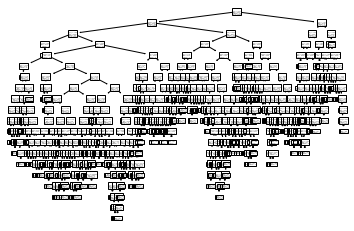

In [56]:
tree.plot_tree(model);

##### graphviz를 사용한 시각화

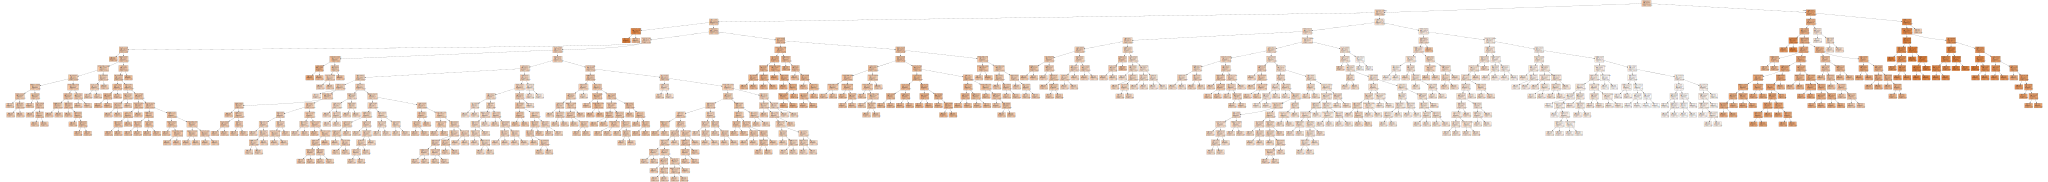

In [61]:
dot_data = tree.export_graphviz(decision_tree=model, 
                                feature_names = boston.feature_names,
                                filled=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

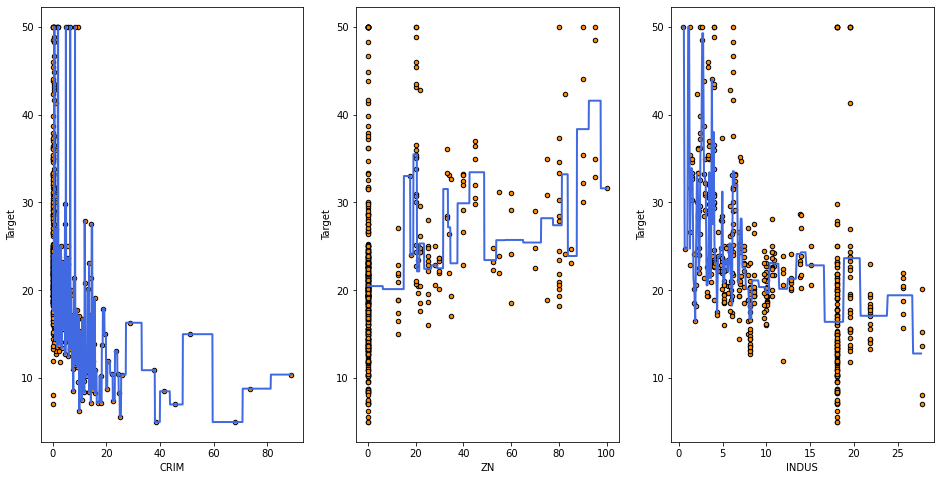

In [67]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0,1,2]):
    X = boston.data[:,pair].reshape(-1, 1)
    y = boston.target

    model = DecisionTreeRegressor()
    model.fit(X, y)

    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

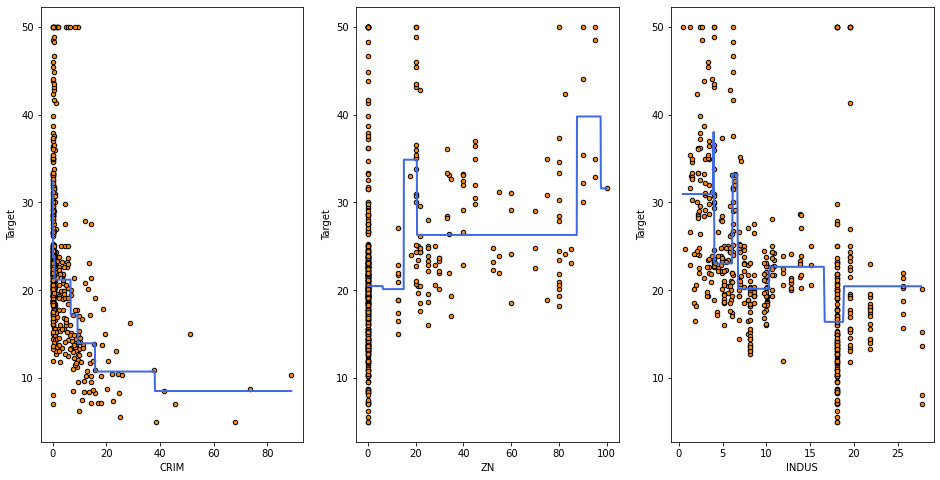

In [71]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0,1,2]):
    X = boston.data[:,pair].reshape(-1, 1)
    y = boston.target

    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)

    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('Target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [72]:
model = DecisionTreeRegressor()

In [74]:
cross_val_score(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
    )

array([-0.3223424 , -0.1411685 , -0.19877163, -0.18390217, -0.11405679])

##### 전처리 후 학습

In [75]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [77]:
cross_val_score(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
    )

array([-0.26508202, -0.04699234, -0.08531837,  0.05083612, -0.19894981])

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

In [81]:
model=DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)
print(tree.export_text(model, feature_names=diabetes.feature_names))

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s1 <= 0.06
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- s6 <= -0.03
|   |   |   |   |   |   |   |   |   |   |--- s2 <= -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s2 >  -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- s6 >  -0.03
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- age <= -0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   

##### plot_tree를 사용한 시각화

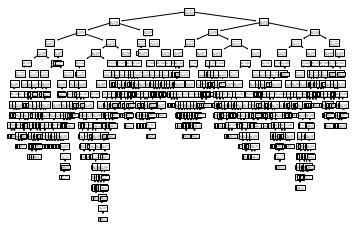

In [83]:
tree.plot_tree(model);

##### graphviz를 사용한 시각화

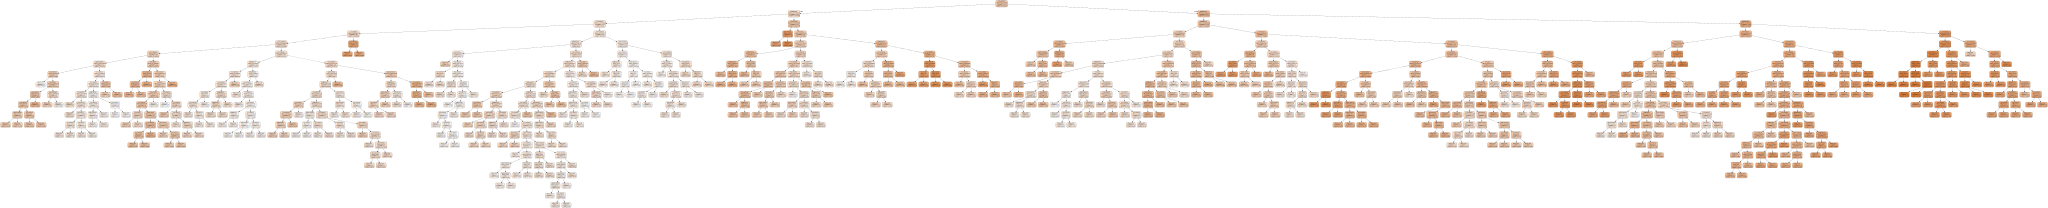

In [86]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=diabetes.feature_names, filled=True, rounded=True,
                                special_characters=True)
graph=graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

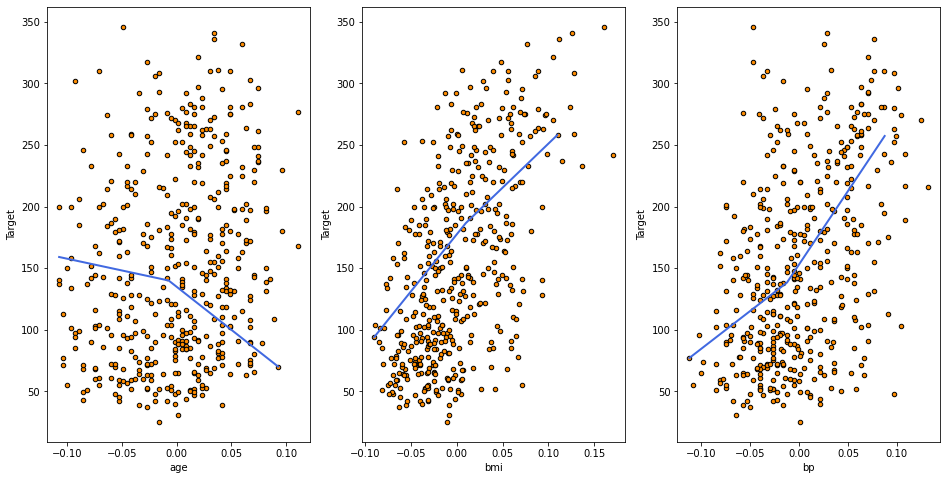

In [88]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0,2,3]):
    X = diabetes.data[:,pair].reshape(-1, 1)
    y = diabetes.targeta

    model = DecisionTreeRegressor()
    model.fit(X, y)

    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

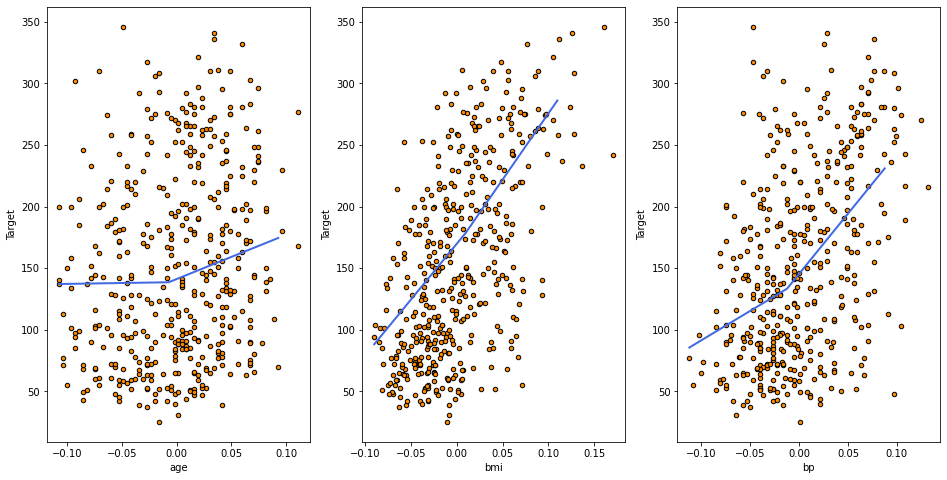

In [91]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0,2,3]):
    X = diabetes.data[:,pair].reshape(-1, 1)
    y = diabetes.target

    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)

    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx+1)
    plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('Target')